# View frequency distribution of tags

In [15]:
# Load dataset114k
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('/data/tumblr_community_identity/dataset114k/matched_reblogs_nonreblogs_dataset114k.csv')
train, test = train_test_split(data, test_size=.2, random_state=9)
train, dev = train_test_split(train, test_size=len(test), random_state=9)
train.shape

/projects/tumblr_community_identity/code/conda_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (12,29,38,42,51,54) have mixed types.Specify dtype option on import or set low_memory=False.



(66552, 76)

In [2]:
all_tags = []
for user_type in ['reblog', 'nonreblog']:
    all_tags += train[f'post_tags_{user_type}_str'].tolist()
len(all_tags)

133104

In [4]:
def stringlist2list(string_list):
    """ Convert a list in string form, like '[one, two]', to a
        list of the items. For example '[one, two]' -> [one, two]
    """
    if isinstance(string_list, float):
        return []
    return string_list[1:-1].split(', ')

In [5]:
# tag_instances = list(map(string_list2str, all_tags))
tag_instances = list(map(stringlist2list, all_tags))
tag_instances = [[t.lower() for t in el if t != ''] for el in tag_instances]
tag_instances = [el for el in tag_instances if el != []]
print(len(tag_instances))
tag_instances

26863

In [6]:
from collections import Counter
doc_ctr = Counter() # tag: n_docs containing that tag
for instance in tag_instances:
    for tag in set(instance):
        doc_ctr[tag] += 1
counts = [count for word, count in doc_ctr.most_common()]
doc_ctr.most_common()

# taglist = [t for el in tag_instances for t in el]
# print(len(taglist))
# taglist

# from collections import Counter
# tag_ctr = Counter(taglist)
# counts = [count for word, count in tag_ctr.most_common()]
# counts
# tag_ctr.most_common()

[('art', 630),
 ('q', 440),
 ('nsfw', 401),
 ('me', 348),
 ('gif', 297),
 ('sexy', 260),
 ('video', 255),
 ('fashion', 252),
 ('hot', 233),
 ('queue', 227),
 ('reblog', 225),
 ('love', 223),
 ('photography', 219),
 ('lol', 212),
 ('cute', 209),
 ('fanart', 184),
 ('marvel', 183),
 ('text', 182),
 ('beautiful', 170),
 ('lesbian', 154),
 ('mine', 154),
 ('selfie', 151),
 ('nude', 150),
 ('funny', 146),
 ('anonymous', 142),
 ('gay', 141),
 ('ass', 138),
 ('sex', 137),
 ('cats', 133),
 ('bts', 133),
 ('porn', 128),
 ('my art', 125),
 ('bnha', 124),
 ('anime', 123),
 ('follow', 122),
 ('amateur', 121),
 ('lgbt', 121),
 ('daddy', 120),
 ('aesthetic', 117),
 ('nature', 115),
 ('boy', 114),
 ('muscle', 114),
 ('pokemon', 112),
 ('voltron', 111),
 ('men', 110),
 ('transgender', 109),
 ('fav', 109),
 ('happy', 107),
 ('pride', 106),
 ('model', 106),
 ('likeforlike', 105),
 ('animals', 104),
 ('beard', 104),
 ('gayteen', 104),
 ('gayboys', 102),
 ('hunk', 102),
 ('pretty girls', 102),
 ('loveislo

In [8]:
freq_counts = set(doc_ctr.values())
freq_counts

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 104,
 105,
 106,
 107,
 109,
 110,
 111,
 112,
 114,
 115,
 117,
 120,
 121,
 122,
 123,
 124,
 125,
 128,
 133,
 137,
 138,
 141,
 142,
 146,
 150,
 151,
 154,
 170,
 182,
 183,
 184,
 209,
 212,
 219,
 223,
 225,
 227,
 233,
 252,
 255,
 260,
 297,
 348,
 401,
 440,
 630}

In [9]:
len(freq_counts)

148

In [14]:
from tqdm.notebook import tqdm

vals = {}
subset = 146
for i in tqdm(list(reversed(list(freq_counts)))[:subset], total=subset):
#     vals[i] = sum([c for c in counts if c >= i])
    # Count non-empty instances that would capture with those tags
#     words = [w for w,c in tag_ctr.items() if c >= i]
    words = [w for w,c in doc_ctr.items() if c >= i]
    n_instances = len([instance for instance in tag_instances if any([w in instance for w in words])])
    vals[i] = n_instances

if 630 in vals:
    del vals[630]
# freqs = {i: f/len(taglist) for i,f in vals.items()}
freqs = {i: f/len(tag_instances) for i,f in vals.items()}
freqs

{440: 0.039198898112645646,
 401: 0.053977589993671596,
 348: 0.06603878941294718,
 297: 0.07579198153594163,
 260: 0.08338607005918922,
 255: 0.09235751777537878,
 252: 0.10050999516062986,
 233: 0.10587052823586346,
 227: 0.11353906860737818,
 225: 0.12072367196515653,
 223: 0.12705207906786287,
 219: 0.13297100100509995,
 212: 0.13941108588020698,
 209: 0.1439526486245021,
 184: 0.14961098909280424,
 183: 0.1553437814093735,
 182: 0.16100212187767562,
 170: 0.16409187358076163,
 154: 0.17280273982801622,
 151: 0.17633920262070507,
 150: 0.17928005062725683,
 146: 0.18214644678554145,
 142: 0.18728362431597365,
 141: 0.18985221308118974,
 138: 0.19216022037747088,
 137: 0.1940215165841492,
 133: 0.20198786434873245,
 128: 0.20310464207273946,
 125: 0.20675278263782898,
 124: 0.2106242787477199,
 123: 0.2133045452853367,
 122: 0.21561255258161785,
 121: 0.22007966347764582,
 120: 0.22264825224286192,
 117: 0.22514238915981089,
 115: 0.22797155939396196,
 114: 0.23202918512452073,
 112

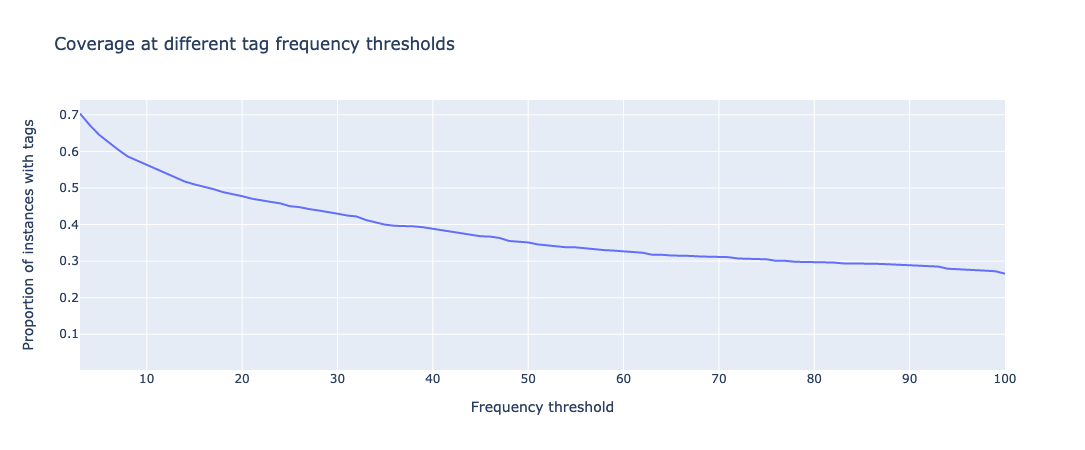

In [24]:
figure = px.line(x=freqs.keys(), y=freqs.values(), labels=dict(x='Frequency threshold', y='Proportion of instances with tags'), 
              title='Coverage at different tag frequency thresholds')
figure.update_xaxes(range=[3,100])
figure.show()

In [20]:
# Plot sparsity of tags vs frequency threshold
freq_unique = {}
for i in freq_counts:
    freq_unique[i] = len([c for c in counts if c >= i])
if 630 in freq_unique:
    del freq_unique[630]
freq_unique

{1: 51548,
 2: 8074,
 3: 4458,
 4: 3144,
 5: 2377,
 6: 1894,
 7: 1582,
 8: 1352,
 9: 1182,
 10: 1074,
 11: 979,
 12: 899,
 13: 822,
 14: 755,
 15: 710,
 16: 666,
 17: 636,
 18: 602,
 19: 579,
 20: 552,
 21: 529,
 22: 515,
 23: 499,
 24: 487,
 25: 468,
 26: 459,
 27: 445,
 28: 435,
 29: 426,
 30: 417,
 31: 405,
 32: 399,
 33: 382,
 34: 368,
 35: 357,
 36: 350,
 37: 347,
 38: 342,
 39: 334,
 40: 326,
 41: 320,
 42: 315,
 43: 306,
 44: 296,
 45: 288,
 46: 285,
 47: 274,
 48: 258,
 49: 253,
 50: 246,
 51: 235,
 52: 230,
 53: 225,
 54: 220,
 55: 218,
 56: 213,
 57: 210,
 58: 205,
 59: 201,
 60: 198,
 61: 191,
 62: 188,
 63: 185,
 64: 184,
 65: 182,
 66: 180,
 67: 178,
 68: 177,
 69: 174,
 70: 173,
 71: 170,
 72: 167,
 73: 164,
 74: 161,
 75: 156,
 76: 152,
 77: 151,
 78: 145,
 79: 141,
 80: 135,
 81: 132,
 82: 127,
 83: 125,
 84: 122,
 85: 116,
 86: 114,
 87: 112,
 88: 107,
 89: 103,
 90: 98,
 91: 93,
 92: 89,
 93: 85,
 94: 80,
 95: 79,
 96: 77,
 97: 73,
 98: 71,
 99: 68,
 100: 62,
 101: 58

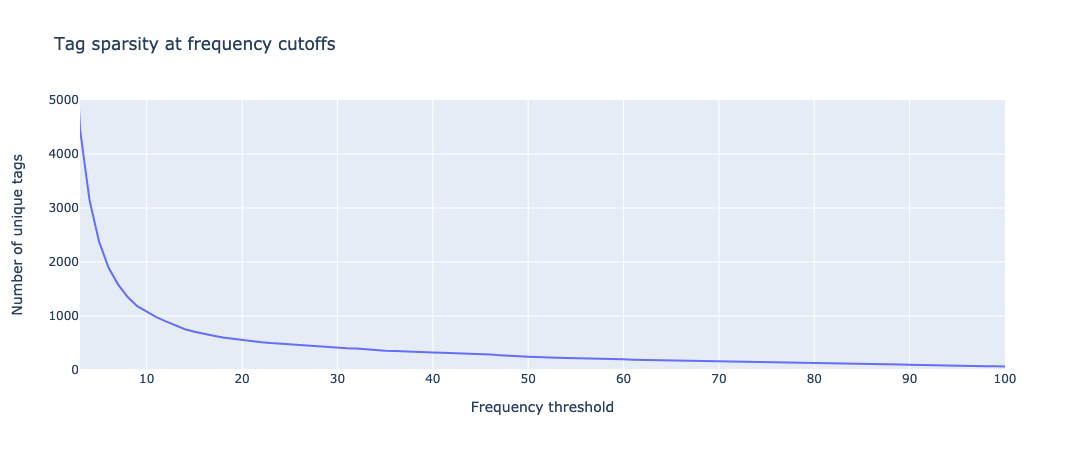

In [23]:
import plotly.express as px

figure = px.line(x=freq_unique.keys(), y=freq_unique.values(), labels=dict(x='Frequency threshold', y='Number of unique tags'), 
              title='Tag sparsity at frequency cutoffs')
figure.update_xaxes(range=[3,100])
figure.update_yaxes(range=[0,5000])
figure.show()

In [56]:
def string_list2str(string_list):
    """ Convert a list in string form, like '[one, two]', to a space-separated
        string of the items. For example '[one, two]' -> 'one two'
    """
    if isinstance(string_list, float):
        return ''
    return ' '.join(string_list[1:-1].split(', '))

# Compare WebSci dataset and dataset114k

## Check for same reblog/nonreblog followee in WebSci dataset (and dataset114k)

In [23]:
# Load WebSci dataset
import os
import pandas as pd

dirpath = '/data/websci2020_tumblr_identity/icwsm2020_sample1k/feature_tables/'
fpath = os.path.join(dirpath, 'reblog_features.csv')
reblogs = pd.read_csv(fpath)
fpath = os.path.join(dirpath, 'nonreblog_features.csv')
nonreblogs = pd.read_csv(fpath)
reblogs.columns

Index(['post_id', 'tumblog_id_follower', 'tumblog_id_followee', 'post_tags',
       'post_type', 'post_note_count', 'processed_blog_description_follower',
       'processed_blog_description_followee', 'age_terms_follower',
       'age_terms_followee', 'ethnicity/nationality_terms_follower',
       'ethnicity/nationality_terms_followee', 'fandoms_terms_follower',
       'fandoms_terms_followee', 'gender_terms_follower',
       'gender_terms_followee', 'gender/sexuality_terms_follower',
       'gender/sexuality_terms_followee', 'interests_terms_follower',
       'interests_terms_followee', 'location_terms_follower',
       'location_terms_followee', 'personality type_terms_follower',
       'personality type_terms_followee', 'pronouns_terms_follower',
       'pronouns_terms_followee', 'relationship status_terms_follower',
       'relationship status_terms_followee', 'roleplay_terms_follower',
       'roleplay_terms_followee', 'roleplay/fandoms_terms_follower',
       'roleplay/fandoms_te

In [29]:
same_followee = [(reblog_followee, nonreblog_followee) for (reblog_followee, nonreblog_followee) in zip(reblogs.tumblog_id_followee, nonreblogs.tumblog_id_followee) if reblog_followee==nonreblog_followee]
len(same_followee)

20336

In [30]:
# Load dataset114k
data = pd.read_csv('/data/tumblr_community_identity/dataset114k/matched_reblogs_nonreblogs_dataset114k.csv')
data

/usr0/home/mamille2/anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (12,29,38,42,51,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,post_id_reblog,activity_time_epoch_reblog,activity_date_reblog,post_title_reblog,post_short_url_reblog,post_slug_reblog,post_type_reblog,post_caption_reblog,post_format_reblog,post_note_count_reblog,...,post_content_reblog_str,reblogged_from_metadata_reblog_str,mentions_reblog_str,post_tags_nonreblog_str,post_content_nonreblog_str,reblogged_from_metadata_nonreblog_str,mentions_nonreblog_str,processed_tumblr_blog_description_follower_reblog,processed_tumblr_blog_description_followee_reblog,processed_tumblr_blog_description_followee_nonreblog
0,180134677524,1542279068,20181115,NaN,https://tmblr.co/ZE4Tsk2dmtGmK,madnessex-shot-by-ricardo-silvestre-for-the,photo,"<p><a href=""http://madnessex.tumblr.com/post/1...",html,231.0,...,"[caption -> <p><a href=""http://madnessex.tumbl...","[parent_post_blog_id -> 117937782, parent_post...",[],"[maleformaz, faggybudz]","[caption -> <p><a href=""http://faggybudz.tumbl...","[parent_post_blog_id -> 106437908, parent_post...",[],the icon/profile pic is a throwback selfie of ...,23|gay|geek|mild kink|europe my stuff validati...,"justin / 28 / phd student / cambridge , uk / a..."
1,178461397088,1537916836,20180926,NaN,https://tmblr.co/ZX4iGy2cD8D1W,grandpasessions-i-feel-my-life-cracking-within,quote,NaN,html,17.0,...,"[format -> html, mentions -> {}, note_count ->...","[parent_post_blog_id -> 76057788, parent_post_...",[],"[facts, factsandchicks, chicks, Minka Kelly, b...",[caption -> <p>Beer is the third most consumed...,[],[],do n't sweat the small stuff,promote your tumblr ! | devil-utopia | | | twi...,creative director and artist based out of nyc ...
2,180607716734,1543464096,20181129,NaN,https://tmblr.co/ZAdeAh2eD3mr_,NaN,photo,NaN,html,8026.0,...,"[caption -> , format -> html, mentions -> {}, ...","[parent_post_blog_id -> 140686598, parent_post...",[],"[Corvette, vette, chevy, chevrolet, cars, auto...","[caption -> <p>1965 Corvette</p>, format -> ht...",[],[],"cute but ... //do n't worry , get a tattoo.//",kübra💫i̇stanbul/18,collection of corvette pictures and videos
3,180056153480,1542078509,20181113,NaN,https://tmblr.co/ZFINix2diBjs8,NaN,photo,NaN,html,5525.0,...,"[caption -> , format -> html, mentions -> {}, ...","[parent_post_blog_id -> 3421480, parent_post_b...",[],[],"[body -> <p><a href=""https://the-eternal-tease...","[parent_post_blog_id -> 200862916, parent_post...",[],queer|oh|27|they/them,i refuse to be a cliché .,"hey baby , when i write , i 'm the hero of my ..."
4,177860778593,1536390010,20180908,NaN,https://tmblr.co/Zd4_9x2bfL1fX,i-have-a-headcanon-that-hermione-insists-her,text,NaN,html,39158.0,...,[body -> I have a headcanon that Hermione insi...,"[parent_post_blog_id -> 19347382, parent_post_...",[],"[sorry if i re-do one or two, ive been meaning...",[caption -> <blockquote><p><small><b>Kommissar...,[],[],i ’ m just a queer nerd who likes to build thi...,obliviate ...,jess . 26 . australian . not spoiler or porn f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110917,180589788455,1543423455,20181128,NaN,https://tmblr.co/ZwkrHa2eB-Nqd,112718,photo,11/27/18,html,41.0,...,"[caption -> 11/27/18, format -> html, mentions...","[parent_post_blog_id -> 366959655, parent_post...",[],[ya bitch me too],"[body -> I just LOVE Australia calum, format -...","[parent_post_blog_id -> 333647828, parent_post...",[],q // nineteen // wrapped around your finger de...,★ we need to talk ★,génèvieve // 19 // i would give my last dying ...
110918,178157783797,1537135868,20180917,NaN,https://tmblr.co/ZW5c-m2bx20hr,NaN,photo,NaN,html,3.0,...,"[caption -> , format -> html, mentions -> {}, ...","[parent_post_blog_id -> 356249823, parent_post...",[],[],"[caption -> <p><a href=""https://kalliokoski.tu...","[parent_post_blog_id -> 433991033, parent_post...",[],"sensibile , pazzamente innamorata di te",instagram : _tought.face_,sw:57kg | cw : 58kg | gw:45kg hi im fatty bitch
110919,180618703114,1543498913,20181129,تفاصيلك وأنا النّساي أذكرها !,https://tmblr.c

In [32]:
same_followee = [(reblog_followee, nonreblog_followee) for (reblog_followee, nonreblog_followee) in zip(
    data.tumblog_id_followee_reblog, data.tumblog_id_followee_nonreblog) if reblog_followee==nonreblog_followee]
len(same_followee)

0

## Check for empty blog descriptions

In [33]:
desc_cols = [col for col in reblogs.columns if 'description' in col]
desc_cols

['processed_blog_description_follower', 'processed_blog_description_followee']

In [49]:
reblogs_nonreblogs = pd.concat([reblogs, nonreblogs], axis=1, keys=['reblog', 'nonreblog'])
reblogs_nonreblogs.columns = [f'{col[1]}_{col[0]}' for col in reblogs_nonreblogs.columns.values]
reblogs_nonreblogs.columns

Index(['post_id_reblog', 'tumblog_id_follower_reblog',
       'tumblog_id_followee_reblog', 'post_tags_reblog', 'post_type_reblog',
       'post_note_count_reblog', 'processed_blog_description_follower_reblog',
       'processed_blog_description_followee_reblog',
       'age_terms_follower_reblog', 'age_terms_followee_reblog',
       'ethnicity/nationality_terms_follower_reblog',
       'ethnicity/nationality_terms_followee_reblog',
       'fandoms_terms_follower_reblog', 'fandoms_terms_followee_reblog',
       'gender_terms_follower_reblog', 'gender_terms_followee_reblog',
       'gender/sexuality_terms_follower_reblog',
       'gender/sexuality_terms_followee_reblog',
       'interests_terms_follower_reblog', 'interests_terms_followee_reblog',
       'location_terms_follower_reblog', 'location_terms_followee_reblog',
       'personality type_terms_follower_reblog',
       'personality type_terms_followee_reblog',
       'pronouns_terms_follower_reblog', 'pronouns_terms_followee_reblo

In [50]:
# Convert to blog descriptions/user
tumblog_cols = [col for col in reblogs_nonreblogs.columns if 'tumblog_id' in col]
print(tumblog_cols)
desc_cols = [col for col in reblogs_nonreblogs.columns if 'blog_description' in col]
print(desc_cols)

['tumblog_id_follower_reblog', 'tumblog_id_followee_reblog', 'tumblog_id_follower_nonreblog', 'tumblog_id_followee_nonreblog']
['processed_blog_description_follower_reblog', 'processed_blog_description_followee_reblog', 'processed_blog_description_follower_nonreblog', 'processed_blog_description_followee_nonreblog']


In [55]:
descs = pd.melt(reblogs_nonreblogs, id_vars=desc_cols, value_vars=tumblog_cols, value_name='tumblog_id', var_name='tumblog_id_user')
melted = pd.melt(descs, id_vars=['tumblog_id', 'tumblog_id_user'], value_vars=desc_cols, value_name='processed_blog_description', var_name='blog_description_user')

def users_match(id_name, desc_name):
    user = id_name.replace('tumblog_id_', '')
    return user in desc_name

mask = [users_match(id_name, desc_name) for id_name, desc_name in zip(melted['tumblog_id_user'], melted['blog_description_user'])]
filtered = melted[mask].drop_duplicates('tumblog_id').set_index('tumblog_id')
descs = filtered.loc[:,['processed_blog_description']]
descs

,processed_blog_description
tumblog_id,
154808845,just for fun
196669962,There's no more beauty in this world! ***IF Y...
345633829,NaN
373830812,• NSFW • come and go as you please nothing bel...
187971634,👌
...,...
97471384,Over 20k followers! 18+ NSFW media blog dedica...
9938005,eianlee@yahoo.com
379503045,NaN


In [58]:
descs.processed_blog_description.isnull().sum()

4976

In [59]:
# Load dataset114k descs
fpath = '/data/tumblr_community_identity/dataset114k/blog_descriptions_dataset114k.csv'
descs114k = pd.read_csv(fpath)
descs114k

,tumblog_id,blog_description,processed_blog_description
0,230551598,<p>the icon/profile pic is a throwback selfie ...,the icon/profile pic is a throwback selfie of ...
1,5570587,don't sweat the small stuff,do n't sweat the small stuff
2,292370290,"<p>cute but ... </p><p>//don't worry, get a ta...","cute but ... //do n't worry , get a tattoo.//"
3,15092909,<p>Queer|OH|27|They/Them</p>,queer|oh|27|they/them
4,24109077,<p>I’m just a queer nerd who likes to build th...,i ’ m just a queer nerd who likes to build thi...
...,...,...,...
294248,424409955,<p>5’4 Cw:104.4 Gw:100 Ugw:86 Lw:102</p><p>Fee...,5 ’ 4 cw:104.4 gw:100 ugw:86 lw:102 feel free ...
294249,427069639,PLEASE READ BIO *~LGBTQ+ and mental illness sa...,please read bio * ~lgbtq+ and mental illness s...
294250,428052346,"<p>restarted lol</p> <a href=""https://www.inst...",restarted lol instagram
294251,438017340,"<p><a href=""https://m.soundcloud.com/ssaad7"">S...",soundcloud


In [60]:
descs114k.processed_blog_description.isnull().sum()

0

In [61]:
descs114k.processed_blog_description.map(lambda x: len(x) == 0).sum()

0

In [63]:
descs114k[descs114k.processed_blog_description.map(lambda x: len(x) <= 2)]

,tumblog_id,blog_description,processed_blog_description
191,246387114,<p>👀👀</p>,👀👀
260,73572276,<p>⭐️</p>,⭐️
726,310899111,<p>✌🏼</p>,✌🏼
1086,256336497,緣起,緣起
1404,418709652,20,20
...,...,...,...
292611,148188266,♡♡,♡♡
293116,356343857,<p>🐺🌕</p>,🐺🌕
293443,260408210,<p>Hi</p>,hi
293485,323728235,<p>🖕🏻</p>,🖕🏻


In [64]:
# Double-check this in matched_reblogs_nonreblogs
data = pd.read_csv('/data/tumblr_community_identity/dataset114k/matched_reblogs_nonreblogs_dataset114k.csv')
data.columns

/usr0/home/mamille2/anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (12,29,38,42,51,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['post_id_reblog', 'activity_time_epoch_reblog', 'activity_date_reblog',
       'post_title_reblog', 'post_short_url_reblog', 'post_slug_reblog',
       'post_type_reblog', 'post_caption_reblog', 'post_format_reblog',
       'post_note_count_reblog', 'reblogged_from_post_id_reblog',
       'created_time_epoch_reblog', 'updated_time_epoch_reblog',
       'source_url_reblog', 'post_id_nonreblog',
       'activity_time_epoch_nonreblog', 'activity_date_nonreblog',
       'post_title_nonreblog', 'post_short_url_nonreblog',
       'post_slug_nonreblog', 'post_type_nonreblog', 'post_caption_nonreblog',
       'post_format_nonreblog', 'post_note_count_nonreblog',
       'reblogged_from_post_id_nonreblog', 'created_time_epoch_nonreblog',
       'updated_time_epoch_nonreblog', 'source_url_nonreblog',
       'tumblog_id_follower_reblog', 'activity_time_epoch_follower_reblog',
       'tumblr_blog_name_follower_reblog', 'tumblr_blog_title_follower_reblog',
       'tumblr_blog_description_foll

In [65]:
desc_cols = [col for col in data.columns if 'processed' in col]
desc_cols

['processed_tumblr_blog_description_follower_reblog',
 'processed_tumblr_blog_description_followee_reblog',
 'processed_tumblr_blog_description_followee_nonreblog']

In [67]:
for col in desc_cols:
    print(data[col].isnull().sum())
    print(data[col].map(lambda x: len(x) == 0).sum())

0
0
0
0
0
0


## Compare proportion of blog descriptions with at least one identity term extracted

In [74]:
# user_types = ['follower_reblog', 'followee_reblog', 'followee_nonreblog']
term_cols = [col for col in reblogs_nonreblogs.columns if 'terms' in col]
print(term_cols)
tumblog_cols = [col for col in reblogs_nonreblogs.columns if 'tumblog_id' in col]
print(tumblog_cols)

['age_terms_follower_reblog', 'age_terms_followee_reblog', 'ethnicity/nationality_terms_follower_reblog', 'ethnicity/nationality_terms_followee_reblog', 'fandoms_terms_follower_reblog', 'fandoms_terms_followee_reblog', 'gender_terms_follower_reblog', 'gender_terms_followee_reblog', 'gender/sexuality_terms_follower_reblog', 'gender/sexuality_terms_followee_reblog', 'interests_terms_follower_reblog', 'interests_terms_followee_reblog', 'location_terms_follower_reblog', 'location_terms_followee_reblog', 'personality type_terms_follower_reblog', 'personality type_terms_followee_reblog', 'pronouns_terms_follower_reblog', 'pronouns_terms_followee_reblog', 'relationship status_terms_follower_reblog', 'relationship status_terms_followee_reblog', 'roleplay_terms_follower_reblog', 'roleplay_terms_followee_reblog', 'roleplay/fandoms_terms_follower_reblog', 'roleplay/fandoms_terms_followee_reblog', 'sexual orientation_terms_follower_reblog', 'sexual orientation_terms_followee_reblog', 'weight_terms

In [75]:
descs = pd.melt(reblogs_nonreblogs, id_vars=term_cols, value_vars=tumblog_cols, value_name='tumblog_id', var_name='tumblog_id_user')
melted = pd.melt(descs, id_vars=['tumblog_id', 'tumblog_id_user'], value_vars=term_cols, value_name='terms', var_name='term_type')
melted

,tumblog_id,tumblog_id_user,term_type,terms
0,154808845,tumblog_id_follower_reblog,age_terms_follower_reblog,[]
1,154808845,tumblog_id_follower_reblog,age_terms_follower_reblog,[]
2,154808845,tumblog_id_follower_reblog,age_terms_follower_reblog,[]
3,154808845,tumblog_id_follower_reblog,age_terms_follower_reblog,[]
4,154808845,tumblog_id_follower_reblog,age_terms_follower_reblog,[]
...,...,...,...,...
171040795,199587161,tumblog_id_followee_nonreblog,zodiac_terms_followee_nonreblog,[]
171040796,171301475,tumblog_id_followee_nonreblog,zodiac_terms_followee_nonreblog,[]
171040797,171301475,tumblog_id_followee_nonreblog,zodiac_terms_followee_nonreblog,[]
171040798,171301475,tumblog_id_followee_nonreblog,zodiac_terms_followee_nonreblog,[]


In [78]:
def users_match(id_name, col_name):
    user = id_name.replace('tumblog_id_', '')
    return user in col_name

mask = [users_match(id_name, col) for id_name, col in zip(melted['tumblog_id_user'], melted['term_type'])]
filtered = melted[mask]
descs = filtered.loc[:,['tumblog_id', 'terms']]
descs

,tumblog_id,terms
0,154808845,[]
1,154808845,[]
2,154808845,[]
3,154808845,[]
4,154808845,[]
...,...,...
171040795,199587161,[]
171040796,171301475,[]
171040797,171301475,[]
171040798,171301475,[]


In [81]:
descs['terms_list'] = descs['terms'].map(lambda x: eval(x))
descs

,tumblog_id,terms,terms_list
0,154808845,[],[]
1,154808845,[],[]
2,154808845,[],[]
3,154808845,[],[]
4,154808845,[],[]
...,...,...,...
171040795,199587161,[],[]
171040796,171301475,[],[]
171040797,171301475,[],[]
171040798,171301475,[],[]


In [83]:
# Took way too long
gped = descs.groupby('tumblog_id').agg({'terms_list': lambda x: sum(x, [])})
gped

,terms_list
tumblog_id,
1,[]
562,[]
3235,"[Travel, Travel, Travel, Travel, Travel, Trave..."
16452,[]
30309,[]
...,...
446726975,[]
446900165,[]
447054434,"[draw, draw, draw, draw, draw, draw, draw, dra..."


In [84]:
gped.terms_list.map(lambda x: len(x) > 0).sum()

17749

If this analysis is correct, then only 17749/34798 blog descriptions in the WebSci dataset have any identity terms at all

# Align blog_info and matched_reblogs_nonreblogs for dataset114k

In [1]:
# Load blog info
import pandas as pd

blog_info = pd.read_csv(
        '/data/tumblr_community_identity/dataset114k/blog_info_dataset114k_processed.csv',
        sep='\t')
blog_info

/usr0/home/mamille2/anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tumblelog_id,activity_time_epoch,tumblr_blog_name,tumblr_blog_title,tumblr_blog_description,tumblr_blog_url,is_group_blog,is_primary,is_private,created_time_epoch,updated_time_epoch,timezone,language,blog_classifier,generated_date,tumblog_id,post_count,processed_tumblr_blog_description
0,418308,1519579385,bloodfarm,blood farm,drawings by jackson s. wingate jacksonwingate@...,http://bloodfarm.tumblr.com/,False,False,false,NaN,NaN,NaN,NaN,safe,20180226,418308,60.0,drawings by jackson s. wingate jacksonwingate ...
1,744750,1565872903,schmidlap,Cratering,"an extrovert who likes hot, sunny weather. can...",https://schmidlap.tumblr.com/,False,False,false,1.235337e+12,1545044437000,US/Central,en_US,safe,20190815,744750,367.0,"an extrovert who likes hot , sunny weather . c..."
2,768760,1536269969,emergentpattern,This is not here,"Nobody calls me ""Mad Dog,"" especially not some...",https://emergentpattern.tumblr.com/,False,False,false,1.236009e+12,1535746059000,US/Central,en_US,safe,20180906,768760,2674.0,"nobody calls me `` mad dog , '' especially not..."
3,1091465,1551759945,reeenuh,"with love, rina",better now?,http://reeenuh.tumblr.com/,False,False,false,1.244067e+12,1546420706000,US/Central,en_US,safe,20190305,1091465,338.0,better now ?
4,1201502,1554178830,seriousjones,i'm a big robot and i want a big cereal,<a href=http://seriousjones.tumblr.com/ask>ask...,http://seriousjones.tumblr.com/,False,False,false,1.246251e+12,1546376543000,US/Eastern,en_US,safe,20190411,1201502,411.0,ask about podcasts postgame of thrones fantast...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300354,444260873,1546510906,tiocyzucons,Joshua Evans,Everything about gay. NSFW Adult only.,https://tiocyzucons.tumblr.com/,False,True,false,1.541130e+12,1546510906000,US/Eastern,en_US,adult,20190610,444260873,52.0,everything about gay . nsfw adult only .
300355,444489472,1550332620,anajinx,AnaJinx,<p>SW:190 CW: 164</p><p> GW: 120</p>,https://anajinx.tumblr.com/,False,False,false,1.541257e+12,1550031818000,US/Eastern,en_US,safe,20190218,444489472,27.0,sw:190 cw : 164 gw : 120
300356,445035704,1542840777,hxhu,LOVE HOTEL 💌,<p>viv 💌 + 16 + used to be @okboy</p>,https://hxhu.tumblr.com/,False,False,false,1.541531e+12,1542734621000,US/Eastern,en_US,safe,20181221,445035704,739.0,viv 💌 + 16 + used to be @ okboy
300357,445357275,1554539801,trlouiscontini,don't you wanna be insane like me?,( grayson dolan. 20. male. he/him. ) ❛ louis c...,https://trlouiscontini.tumblr.com/,False,False,false,1.541710e+12,1553047312000,Europe/Paris,en_US,safe,20190611,445357275,145.0,( grayson dolan . 20. male . he/him . ) ❛ loui...


In [2]:
data = pd.read_csv('/data/tumblr_community_identity/dataset114k/matched_reblogs_nonreblogs_dataset114k.csv')
print(data.columns)
data

/usr0/home/mamille2/anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (12,29,38,42,51,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['post_id_reblog', 'activity_time_epoch_reblog', 'activity_date_reblog',
       'post_title_reblog', 'post_short_url_reblog', 'post_slug_reblog',
       'post_type_reblog', 'post_caption_reblog', 'post_format_reblog',
       'post_note_count_reblog', 'reblogged_from_post_id_reblog',
       'created_time_epoch_reblog', 'updated_time_epoch_reblog',
       'source_url_reblog', 'post_id_nonreblog',
       'activity_time_epoch_nonreblog', 'activity_date_nonreblog',
       'post_title_nonreblog', 'post_short_url_nonreblog',
       'post_slug_nonreblog', 'post_type_nonreblog', 'post_caption_nonreblog',
       'post_format_nonreblog', 'post_note_count_nonreblog',
       'reblogged_from_post_id_nonreblog', 'created_time_epoch_nonreblog',
       'updated_time_epoch_nonreblog', 'source_url_nonreblog',
       'tumblog_id_follower_reblog', 'activity_time_epoch_follower_reblog',
       'tumblr_blog_name_follower_reblog', 'tumblr_blog_title_follower_reblog',
       'tumblr_blog_description_foll

,post_id_reblog,activity_time_epoch_reblog,activity_date_reblog,post_title_reblog,post_short_url_reblog,post_slug_reblog,post_type_reblog,post_caption_reblog,post_format_reblog,post_note_count_reblog,...,post_content_reblog_str,reblogged_from_metadata_reblog_str,mentions_reblog_str,post_tags_nonreblog_str,post_content_nonreblog_str,reblogged_from_metadata_nonreblog_str,mentions_nonreblog_str,processed_tumblr_blog_description_follower_reblog,processed_tumblr_blog_description_followee_reblog,processed_tumblr_blog_description_followee_nonreblog
0,180134677524,1542279068,20181115,NaN,https://tmblr.co/ZE4Tsk2dmtGmK,madnessex-shot-by-ricardo-silvestre-for-the,photo,"<p><a href=""http://madnessex.tumblr.com/post/1...",html,231.0,...,"[caption -> <p><a href=""http://madnessex.tumbl...","[parent_post_blog_id -> 117937782, parent_post...",[],"[maleformaz, faggybudz]","[caption -> <p><a href=""http://faggybudz.tumbl...","[parent_post_blog_id -> 106437908, parent_post...",[],the icon/profile pic is a throwback selfie of ...,23|gay|geek|mild kink|europe my stuff validati...,"justin / 28 / phd student / cambridge , uk / a..."
1,178461397088,1537916836,20180926,NaN,https://tmblr.co/ZX4iGy2cD8D1W,grandpasessions-i-feel-my-life-cracking-within,quote,NaN,html,17.0,...,"[format -> html, mentions -> {}, note_count ->...","[parent_post_blog_id -> 76057788, parent_post_...",[],"[facts, factsandchicks, chicks, Minka Kelly, b...",[caption -> <p>Beer is the third most consumed...,[],[],do n't sweat the small stuff,promote your tumblr ! | devil-utopia | | | twi...,creative director and artist based out of nyc ...
2,180607716734,1543464096,20181129,NaN,https://tmblr.co/ZAdeAh2eD3mr_,NaN,photo,NaN,html,8026.0,...,"[caption -> , format -> html, mentions -> {}, ...","[parent_post_blog_id -> 140686598, parent_post...",[],"[Corvette, vette, chevy, chevrolet, cars, auto...","[caption -> <p>1965 Corvette</p>, format -> ht...",[],[],"cute but ... //do n't worry , get a tattoo.//",kübra💫i̇stanbul/18,collection of corvette pictures and videos
3,180056153480,1542078509,20181113,NaN,https://tmblr.co/ZFINix2diBjs8,NaN,photo,NaN,html,5525.0,...,"[caption -> , format -> html, mentions -> {}, ...","[parent_post_blog_id -> 3421480, parent_post_b...",[],[],"[body -> <p><a href=""https://the-eternal-tease...","[parent_post_blog_id -> 200862916, parent_post...",[],queer|oh|27|they/them,i refuse to be a cliché .,"hey baby , when i write , i 'm the hero of my ..."
4,177860778593,1536390010,20180908,NaN,https://tmblr.co/Zd4_9x2bfL1fX,i-have-a-headcanon-that-hermione-insists-her,text,NaN,html,39158.0,...,[body -> I have a headcanon that Hermione insi...,"[parent_post_blog_id -> 19347382, parent_post_...",[],"[sorry if i re-do one or two, ive been meaning...",[caption -> <blockquote><p><small><b>Kommissar...,[],[],i ’ m just a queer nerd who likes to build thi...,obliviate ...,jess . 26 . australian . not spoiler or porn f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110917,180589788455,1543423455,20181128,NaN,https://tmblr.co/ZwkrHa2eB-Nqd,112718,photo,11/27/18,html,41.0,...,"[caption -> 11/27/18, format -> html, mentions...","[parent_post_blog_id -> 366959655, parent_post...",[],[ya bitch me too],"[body -> I just LOVE Australia calum, format -...","[parent_post_blog_id -> 333647828, parent_post...",[],q // nineteen // wrapped around your finger de...,★ we need to talk ★,génèvieve // 19 // i would give my last dying ...
110918,178157783797,1537135868,20180917,NaN,https://tmblr.co/ZW5c-m2bx20hr,NaN,photo,NaN,html,3.0,...,"[caption -> , format -> html, mentions -> {}, ...","[parent_post_blog_id -> 356249823, parent_post...",[],[],"[caption -> <p><a href=""https://kalliokoski.tu...","[parent_post_blog_id -> 433991033, parent_post...",[],"sensibile , pazzamente innamorata di te",instagram : _tought.face_,sw:57kg | cw : 58kg | gw:45kg hi im fatty bitch
110919,180618703114,1543498913,20181129,تفاصيلك وأنا النّساي أذكرها !,https://tmblr.c

In [25]:
user_cols = [col for col in data.columns if 'followe' in col]
user_cols_stubs = set([col.split('_followe')[0] for col in user_cols])
user_cols_stubs

{'activity_time_epoch',
 'created_time_epoch',
 'is_group_blog',
 'is_primary',
 'is_private',
 'language',
 'post_count',
 'processed_tumblr_blog_description',
 'tumblog_id',
 'tumblr_blog_description',
 'tumblr_blog_name',
 'tumblr_blog_title',
 'tumblr_blog_url',
 'updated_time_epoch'}

In [26]:
descs = pd.wide_to_long(data, stubnames=user_cols_stubs, i='post_id_reblog', j='user_type', suffix=r'_followe(r|e)_(non)?reblog')
descs

post_type_reblog  \
post_id_reblog user_type                              
7302573385     _followee_nonreblog            photo   
               _followee_reblog               photo   
               _follower_reblog               photo   
8012645200     _followee_nonreblog            photo   
               _followee_reblog               photo   
...                                             ...   
180663567944   _followee_reblog                text   
               _follower_reblog                text   
180663590295   _followee_nonreblog             text   
               _followee_reblog                text   
               _follower_reblog                text   

                                            post_tags_reblog_str  \
post_id_reblog user_type                                           
7302573385     _followee_nonreblog                           NaN   
               _followee_reblog                              NaN   
               _follower_reblog                              NaN   
8012645200     _followee_nonreblog  [glee, art, blaine anderson]   
               _followee_reblog     [glee, art, blaine anderson]   
...                                                          ...   
180663567944   _followee_reblog                               []   
               _follower_reblog                               []   
180663590295   _followee_nonreblog                            []   
               _followee_reblog                               []   
               _follower_reblog                               []   

                                   mentions_reblog_str  \
post_id_reblog user_type                                 
7302573385     _followee_nonreblog                 NaN   
               _followee_reblog                    NaN   
               _follower_reblog                    NaN   
8012645200     _followee_nonreblog                  []   
               _followee_reblog                     []   
...                                                ...   
180663567944   _followee_reblog                     []   
               _follower_reblog                     []   
180663590295   _followee_nonreblog                  []   
               _followee_reblog                     []   
               _follower_reblog                     []   

                                    activity_time_epoch_reblog  \
post_id_reblog user_type                                         
7302573385     _followee_nonreblog                  1531007669   
               _followee_reblog                     1531007669   
               _follower_reblog                     1531007669   
8012645200     _followee_nonreblog                  1538161475   
               _followee_reblog                     1538161475   
...                                                        ...   
180663567944   _followee_reblog                     1543614721   
               _follower_reblog                     1543614721   
180663590295   _followee_nonreblog                  1543614776   
               _followee_reblog                     1543614776   
               _follower_reblog                     1543614776   

                                                               post_caption_nonreblog  \
post_id_reblog user_type                                                                
7302573385     _followee_nonreblog                                                NaN   
               _followee_reblog                                                   NaN   
               _follower_reblog                                                   NaN   
8012645200     _followee_nonreblog                                                NaN   
               _followee_reblog                                                   NaN   
...                                                                               ...   
180663567944   _followee_reblog                                                   NaN   
               _fol

In [28]:
descs = descs[user_cols_stubs]
descs

language  created_time_epoch  \
post_id_reblog user_type                                          
7302573385     _followee_nonreblog    en_US        1.389199e+12   
               _followee_reblog       en_US        1.301928e+12   
               _follower_reblog       en_US        1.301189e+12   
8012645200     _followee_nonreblog    en_US        1.361120e+12   
               _followee_reblog       en_US        1.263865e+12   
...                                     ...                 ...   
180663567944   _followee_reblog       en_US        1.315174e+12   
               _follower_reblog       en_US        1.314938e+12   
180663590295   _followee_nonreblog    es_ES        1.512251e+12   
               _followee_reblog       en_US        1.521362e+12   
               _follower_reblog       en_US        1.543512e+12   

                                                    processed_tumblr_blog_description  \
post_id_reblog user_type                                                                
7302573385     _followee_nonreblog  ace/29/female/happily taken by galactic-knight...   
               _followee_reblog     amy , 23 , sydney , australia . ✨ graphic desi...   
               _follower_reblog              i post a lot of tmnt and other garbage .   
8012645200     _followee_nonreblog  name 's lizzie , i 'm 20 , she/her , a huge sc...   
               _followee_reblog                                  kendra , 22 , canada   
...                                                                               ...   
180663567944   _followee_reblog        23 || ♍ || intj || pan || genderfluid || taken   
               _follower_reblog          my name is kayla and i am a french pancake .   
180663590295   _followee_nonreblog  this is my everything blog , hope you enjoy it...   
               _followee_reblog              | memes | terf safe | uk | 17 | janine |   
               _follower_reblog     this is the 4th fucking time i had to make ano...   

                                                              tumblr_blog_description  \
post_id_reblog user_type                                                                
7302573385     _followee_nonreblog  <p>Ace/29/female/happily taken by galactic-kni...   
               _followee_reblog     Amy, 23, Sydney, Australia. ✨ Graphic design a...   
               _follower_reblog        <p>I post a lot of TMNT and other garbage.</p>   
8012645200     _followee_nonreblog  Name's Lizzie, I'm 20, she/her, a huge sci-fi ...   
               _followee_reblog                                    kendra, 22, canada   
...                                                                               ...   
180663567944   _followee_reblog        23 || ♍ || intj || pan || genderfluid || taken   
               _follower_reblog           My name is Kayla and I am a french pancake.   
180663590295   _followee_nonreblog  This is my everything blog, hope you enjoy it ...   
               _followee_reblog              | Memes | Terf safe | UK | 17 | Janine |   
               _follower_reblog     this is the 4th fucking time i had to make ano...   

                                    is_primary is_private updated_time_epoch  \
post_id_reblog user_type                                                       
7302573385     _followee_nonreblog        True      false      1546211412000   
               _followee_reblog          False      false      1546224795000   
               _follower_reblog          False      False    1543078924000.0   
8012645200     _followee_nonreblog       False      false      1530044420000   
               _followee_reblog          False      false      1545681604000   
...                                        ...        ...                ...   
180663567944   _followee_reblog          False      False    1519103947000.0   
               _follower_reblog          False      False    1545757036000.0   
180663590295   _followee_nonreblog       False 

In [31]:
descs = descs.drop_duplicates('tumblog_id').set_index('tumblog_id')
descs

,language,created_time_epoch,processed_tumblr_blog_description,tumblr_blog_description,is_primary,is_private,updated_time_epoch,post_count,tumblr_blog_title,is_group_blog,tumblr_blog_url,activity_time_epoch,tumblr_blog_name
tumblog_id,,,,,,,,,,,,,
165015715,en_US,1.389199e+12,ace/29/female/happily taken by galactic-knight...,<p>Ace/29/female/happily taken by galactic-kni...,True,false,1546211412000,NaN,Go! Go! Bravo!,False,http://goteambravo.tumblr.com/,1546211412,goteambravo
16189626,en_US,1.301928e+12,"amy , 23 , sydney , australia . ✨ graphic desi...","Amy, 23, Sydney, Australia. ✨ Graphic design a...",False,false,1546224795000,NaN,枚方生まれ、枚方育ち,False,https://tomicen.tumblr.com/,1562581644,tomicen
15711631,en_US,1.301189e+12,i post a lot of tmnt and other garbage .,<p>I post a lot of TMNT and other garbage.</p>,False,False,1543078924000.0,31420.0,Pessimistic Procrastination,False,https://sparkle148.tumblr.com/,1544982349,sparkle148
94232773,en_US,1.361120e+12,"name 's lizzie , i 'm 20 , she/her , a huge sc...","Name's Lizzie, I'm 20, she/her, a huge sci-fi ...",False,false,1530044420000,NaN,Sold My Soul To Wynonna Earp,False,http://goddamnalientourists.tumblr.com/,1543260493,goddamnalientourists
3003245,en_US,1.263865e+12,"kendra , 22 , canada","kendra, 22, canada",False,false,1545681604000,NaN,just a face and a name,False,https://wherethepotterthingsare.tumblr.com/,1565400429,wherethepotterthingsare
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177356292,tr_TR,1.395695e+12,ig/anlakbulat,<p>ig/anlakbulat</p>,False,false,1536688976000,715.0,Anıl,False,https://ceranimoo.tumblr.com/,1545951611,ceranimoo
27783944,en_US,1.314938e+12,my name is kayla and i am a french pancake .,My name is Kayla and I am a french pancake.,False,False,1545757036000.0,43.0,"Rocks Fall, Everyone Dies",False,https://totescrepe.tumblr.com/,1562464888,totescrepe
381006151,es_ES,1.512251e+12,"this is my everything blog , hope you enjoy it...","This is my everything blog, hope you enjoy it ...",False,false,1550947633000,NaN,NaN,False,https://kymsmith.tumblr.com/,1562703127,kymsmith


In [34]:
cols = descs.columns.tolist()
cols = [cols[-1]] + [cols[-3]] + [cols[3]] + [cols[2]] + [cols[-5]] + cols[:2] + cols[4:-5] + [cols[-4]] + [cols[-2]]
cols

['tumblr_blog_name',
 'tumblr_blog_url',
 'tumblr_blog_description',
 'processed_tumblr_blog_description',
 'tumblr_blog_title',
 'language',
 'created_time_epoch',
 'is_primary',
 'is_private',
 'updated_time_epoch',
 'post_count',
 'is_group_blog',
 'activity_time_epoch']

In [35]:
descs = descs[cols]
descs

,tumblr_blog_name,tumblr_blog_url,tumblr_blog_description,processed_tumblr_blog_description,tumblr_blog_title,language,created_time_epoch,is_primary,is_private,updated_time_epoch,post_count,is_group_blog,activity_time_epoch
tumblog_id,,,,,,,,,,,,,
165015715,goteambravo,http://goteambravo.tumblr.com/,<p>Ace/29/female/happily taken by galactic-kni...,ace/29/female/happily taken by galactic-knight...,Go! Go! Bravo!,en_US,1.389199e+12,True,false,1546211412000,NaN,False,1546211412
16189626,tomicen,https://tomicen.tumblr.com/,"Amy, 23, Sydney, Australia. ✨ Graphic design a...","amy , 23 , sydney , australia . ✨ graphic desi...",枚方生まれ、枚方育ち,en_US,1.301928e+12,False,false,1546224795000,NaN,False,1562581644
15711631,sparkle148,https://sparkle148.tumblr.com/,<p>I post a lot of TMNT and other garbage.</p>,i post a lot of tmnt and other garbage .,Pessimistic Procrastination,en_US,1.301189e+12,False,False,1543078924000.0,31420.0,False,1544982349
94232773,goddamnalientourists,http://goddamnalientourists.tumblr.com/,"Name's Lizzie, I'm 20, she/her, a huge sci-fi ...","name 's lizzie , i 'm 20 , she/her , a huge sc...",Sold My Soul To Wynonna Earp,en_US,1.361120e+12,False,false,1530044420000,NaN,False,1543260493
3003245,wherethepotterthingsare,https://wherethepotterthingsare.tumblr.com/,"kendra, 22, canada","kendra , 22 , canada",just a face and a name,en_US,1.263865e+12,False,false,1545681604000,NaN,False,1565400429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177356292,ceranimoo,https://ceranimoo.tumblr.com/,<p>ig/anlakbulat</p>,ig/anlakbulat,Anıl,tr_TR,1.395695e+12,False,false,1536688976000,715.0,False,1545951611
27783944,totescrepe,https://totescrepe.tumblr.com/,My name is Kayla and I am a french pancake.,my name is kayla and i am a french pancake .,"Rocks Fall, Everyone Dies",en_US,1.314938e+12,False,False,1545757036000.0,43.0,False,1562464888
381006151,kymsmith,https://kymsmith.tumblr.com/,"This is my everything blog, hope you enjoy it ...","this is my everything blog , hope you enjoy it...",NaN,es_ES,1.512251e+12,False,false,1550947633000,NaN,False,1562703127


In [36]:
# Save out
descs.to_csv('/data/tumblr_community_identity/dataset114k/blog_info_dataset114k.csv')

## Old

In [3]:
follower_cols = [col for col in data.columns if 'follower' in col]
print(follower_cols)
print()
followee_reblog_cols = [col for col in data.columns if 'followee_reblog' in col]
print(followee_reblog_cols)
print()
followee_nonreblog_cols = [col for col in data.columns if 'followee_nonreblog' in col]
print(followee_nonreblog_cols)
print()

In [6]:
follower_data = data[follower_cols].drop(columns=['post_count_follower_reblog'])
print(follower_data.shape)
followee_reblog_data = data[followee_reblog_cols]
print(followee_reblog_data.shape)
followee_nonreblog_data = data[followee_nonreblog_cols]
print(followee_nonreblog_data.shape)

(110922, 13)
(110922, 13)
(110922, 13)


In [ ]:
user_info = pd.concat([follower_data, followee_reblog_data, followee_nonreblog_data])

In [3]:
tumblog_cols = [col for col in data.columns if 'tumblog_id' in col]
print(tumblog_cols)
info_cols = [col for col in data.columns if 'blog_name' in col]
print(info_cols)
desc_cols = [col for col in data.columns if 'blog_description' in col and 'processed' not in col]
print(desc_cols)
proc_cols = [col for col in data.columns if 'processed' in col]
print(proc_cols)

descs = pd.melt(data, id_vars=desc_cols+proc_cols+info_cols, value_vars=tumblog_cols, value_name='tumblog_id', var_name='tumblog_id_user')
# descs = pd.wide_to_long(data, ['tumblog_id'], i='post_id_reblog', j='tumblog_id')
descs

['tumblog_id_follower_reblog', 'tumblog_id_followee_reblog', 'tumblog_id_followee_nonreblog']
['tumblr_blog_name_follower_reblog', 'tumblr_blog_name_followee_reblog', 'tumblr_blog_name_followee_nonreblog']
['tumblr_blog_description_follower_reblog', 'tumblr_blog_description_followee_reblog', 'tumblr_blog_description_followee_nonreblog']
['processed_tumblr_blog_description_follower_reblog', 'processed_tumblr_blog_description_followee_reblog', 'processed_tumblr_blog_description_followee_nonreblog']


,tumblr_blog_description_follower_reblog,tumblr_blog_description_followee_reblog,tumblr_blog_description_followee_nonreblog,processed_tumblr_blog_description_follower_reblog,processed_tumblr_blog_description_followee_reblog,processed_tumblr_blog_description_followee_nonreblog,tumblr_blog_name_follower_reblog,tumblr_blog_name_followee_reblog,tumblr_blog_name_followee_nonreblog,tumblog_id_user,tumblog_id
0,<p>the icon/profile pic is a throwback selfie ...,<p>23|Gay|Geek|Mild Kink|Europe</p><p><a href=...,"Justin / 28 / PhD student / Cambridge, UK / <a...",the icon/profile pic is a throwback selfie of ...,23|gay|geek|mild kink|europe my stuff validati...,"justin / 28 / phd student / cambridge , uk / a...",a-brand-new-art-form,europiancodi,beautiful-untrue-things,tumblog_id_follower_reblog,230551598
1,don't sweat the small stuff,"<a href=""http://tumblrplug.com"" target=""_blank...",Creative Director and Artist based out of NYC....,do n't sweat the small stuff,promote your tumblr ! | devil-utopia | | | twi...,creative director and artist based out of nyc ...,feigninterest,ca1iban,gustonyc,tumblog_id_follower_reblog,5570587
2,"<p>cute but ... </p><p>//don't worry, get a ta...",<p>Kübra💫İstanbul/18</p>,Collection of Corvette Pictures and Videos,"cute but ... //do n't worry , get a tattoo.//",kübra💫i̇stanbul/18,collection of corvette pictures and videos,alkollukirmizi,urlmievdeunuttum,corvettes,tumblog_id_follower_reblog,292370290
3,<p>Queer|OH|27|They/Them</p>,<p>I refuse to be a cliché.</p> <!-- Start of ...,"<center>Hey baby, when I write, I'm the hero o...",queer|oh|27|they/them,i refuse to be a cliché .,"hey baby , when i write , i 'm the hero of my ...",the-unicorn-pixie,andstayedoutofsight,foureyes-thunderthighs,tumblog_id_follower_reblog,15092909
4,<p>I’m just a queer nerd who likes to build th...,Obliviate...,<p>Jess. 26. Australian.</p><p>Not spoiler or ...,i ’ m just a queer nerd who likes to build thi...,obliviate ...,jess . 26 . australian . not spoiler or porn f...,deathdefyinglifeleaps,alexhess2,rey-burkle,tumblog_id_follower_reblog,24109077
...,...,...,...,...,...,...,...,...,...,...,...
332761,q // nineteen // wrapped around your finger de...,"<p><a href=""http://maxxthealien.tumblr.com/abo...",<p>Génèvieve // 19 // i would give my last dyi...,q // nineteen // wrapped around your finger de...,★ we need to talk ★,génèvieve // 19 // i would give my last dying ...,cashtcn,maxxthealien,wildhearthood,tumblog_id_followee_nonreblog,431347517
332762,"Sensibile, pazzamente innamorata di te",<p>Instagram:_tought.face_</p>,<p>sw:57kg | cw: 58kg | gw:45kg HI IM FATTY BI...,"sensibile , pazzamente innamorata di te",instagram : _tought.face_,sw:57kg | cw : 58kg | gw:45kg hi im fatty bitch,kiaaa88,federoscia,krucha-lenka,tumblog_id_followee_nonreblog,433925064
332763,<p>Fake it till you make it..</p>,<p>be better and do better </p><p>“ +966 +965 ...,"<p><a href=""https://m.soundcloud.com/ssaad7"">S...",fake it till you make it ..,be better and do better “ +966 +965 “,soundcloud,rxalawaji,saudii-minded,shahadj7,tumblog_id_followee_nonreblog,438017340
332764,终点回到原点享受那走不完的路,约炮平台----男生+微信xiehou-8女生+微信nvsheng-2018入群约炮,为成功找方法，不为失败找借口,终点回到原点享受那走不完的路,约炮平台 -- -- 男生+微信xiehou-8女生+微信nvsheng-2018入群约炮,为成功找方法，不为失败找借口,rykumo,superhotguygeoffreylove,ralapyrode,tumblog_id_followee_nonreblog,441222861


In [10]:
# Select blog descriptions appropriately
melted = pd.melt(descs, id_vars=['tumblog_id', 'tumblog_id_user']+proc_cols+info_cols, value_vars=desc_cols, value_name='blog_description', var_name='blog_description_user')
melted

,tumblog_id,tumblog_id_user,processed_tumblr_blog_description_follower_reblog,processed_tumblr_blog_description_followee_reblog,processed_tumblr_blog_description_followee_nonreblog,blog_description_user,blog_description
0,230551598,tumblog_id_follower_reblog,the icon/profile pic is a throwback selfie of ...,23|gay|geek|mild kink|europe my stuff validati...,"justin / 28 / phd student / cambridge , uk / a...",tumblr_blog_description_follower_reblog,<p>the icon/profile pic is a throwback selfie ...
1,5570587,tumblog_id_follower_reblog,do n't sweat the small stuff,promote your tumblr ! | devil-utopia | | | twi...,creative director and artist based out of nyc ...,tumblr_blog_description_follower_reblog,don't sweat the small stuff
2,292370290,tumblog_id_follower_reblog,"cute but ... //do n't worry , get a tattoo.//",kübra💫i̇stanbul/18,collection of corvette pictures and videos,tumblr_blog_description_follower_reblog,"<p>cute but ... </p><p>//don't worry, get a ta..."
3,15092909,tumblog_id_follower_reblog,queer|oh|27|they/them,i refuse to be a cliché .,"hey baby , when i write , i 'm the hero of my ...",tumblr_blog_description_follower_reblog,<p>Queer|OH|27|They/Them</p>
4,24109077,tumblog_id_follower_reblog,i ’ m just a queer nerd who likes to build thi...,obliviate ...,jess . 26 . australian . not spoiler or porn f...,tumblr_blog_description_follower_reblog,<p>I’m just a queer nerd who likes to build th...
...,...,...,...,...,...,...,...
998293,431347517,tumblog_id_followee_nonreblog,q // nineteen // wrapped around your finger de...,★ we need to talk ★,génèvieve // 19 // i would give my last dying ...,tumblr_blog_description_followee_nonreblog,<p>Génèvieve // 19 // i would give my last dyi...
998294,433925064,tumblog_id_followee_nonreblog,"sensibile , pazzamente innamorata di te",instagram : _tought.face_,sw:57kg | cw : 58kg | gw:45kg hi im fatty bitch,tumblr_blog_description_followee_nonreblog,<p>sw:57kg | cw: 58kg | gw:45kg HI IM FATTY BI...
998295,438017340,tumblog_id_followee_nonreblog,fake it till you make it ..,be better and do better “ +966 +965 “,soundcloud,tumblr_blog_description_followee_nonreblog,"<p><a href=""https://m.soundcloud.com/ssaad7"">S..."
998296,441222861,tumblog_id_followee_nonreblog,终点回到原点享受那走不完的路,约炮平台 -- -- 男生+微信xiehou-8女生+微信nvsheng-2018入群约炮,为成功找方法，不为失败找借口,tumblr_blog_description_followee_nonreblog,为成功找方法，不为失败找借口


In [12]:
melted_again = pd.melt(melted, id_vars=['tumblog_id', 'tumblog_id_user', 'blog_description_user', 'blog_description'], value_vars=proc_cols, value_name='processed_blog_description', var_name='processed_blog_description_user')
melted_again

,tumblog_id,tumblog_id_user,blog_description_user,blog_description,processed_blog_description_user,processed_blog_description
0,230551598,tumblog_id_follower_reblog,tumblr_blog_description_follower_reblog,<p>the icon/profile pic is a throwback selfie ...,processed_tumblr_blog_description_follower_reblog,the icon/profile pic is a throwback selfie of ...
1,5570587,tumblog_id_follower_reblog,tumblr_blog_description_follower_reblog,don't sweat the small stuff,processed_tumblr_blog_description_follower_reblog,do n't sweat the small stuff
2,292370290,tumblog_id_follower_reblog,tumblr_blog_description_follower_reblog,"<p>cute but ... </p><p>//don't worry, get a ta...",processed_tumblr_blog_description_follower_reblog,"cute but ... //do n't worry , get a tattoo.//"
3,15092909,tumblog_id_follower_reblog,tumblr_blog_description_follower_reblog,<p>Queer|OH|27|They/Them</p>,processed_tumblr_blog_description_follower_reblog,queer|oh|27|they/them
4,24109077,tumblog_id_follower_reblog,tumblr_blog_description_follower_reblog,<p>I’m just a queer nerd who likes to build th...,processed_tumblr_blog_description_follower_reblog,i ’ m just a queer nerd who likes to build thi...
...,...,...,...,...,...,...
2994889,431347517,tumblog_id_followee_nonreblog,tumblr_blog_description_followee_nonreblog,<p>Génèvieve // 19 // i would give my last dyi...,processed_tumblr_blog_description_followee_non...,génèvieve // 19 // i would give my last dying ...
2994890,433925064,tumblog_id_followee_nonreblog,tumblr_blog_description_followee_nonreblog,<p>sw:57kg | cw: 58kg | gw:45kg HI IM FATTY BI...,processed_tumblr_blog_description_followee_non...,sw:57kg | cw : 58kg | gw:45kg hi im fatty bitch
2994891,438017340,tumblog_id_followee_nonreblog,tumblr_blog_description_followee_nonreblog,"<p><a href=""https://m.soundcloud.com/ssaad7"">S...",processed_tumblr_blog_description_followee_non...,soundcloud
2994892,441222861,tumblog_id_followee_nonreblog,tumblr_blog_description_followee_nonreblog,为成功找方法，不为失败找借口,processed_tumblr_blog_description_followee_non...,为成功找方法，不为失败找借口


In [16]:
def users_match(id_name, desc_name, proc_name):
    user = id_name.replace('tumblog_id_', '')
    return user in desc_name and user in proc_name

mask = [users_match(id_name, desc_name, proc_name) for id_name, desc_name, proc_name in zip(
    melted_again['tumblog_id_user'], melted_again['blog_description_user'], melted_again['processed_blog_description_user'])]
filtered = melted_again[mask]
filtered

,tumblog_id,tumblog_id_user,blog_description_user,blog_description,processed_blog_description_user,processed_blog_description
0,230551598,tumblog_id_follower_reblog,tumblr_blog_description_follower_reblog,<p>the icon/profile pic is a throwback selfie ...,processed_tumblr_blog_description_follower_reblog,the icon/profile pic is a throwback selfie of ...
1,5570587,tumblog_id_follower_reblog,tumblr_blog_description_follower_reblog,don't sweat the small stuff,processed_tumblr_blog_description_follower_reblog,do n't sweat the small stuff
2,292370290,tumblog_id_follower_reblog,tumblr_blog_description_follower_reblog,"<p>cute but ... </p><p>//don't worry, get a ta...",processed_tumblr_blog_description_follower_reblog,"cute but ... //do n't worry , get a tattoo.//"
3,15092909,tumblog_id_follower_reblog,tumblr_blog_description_follower_reblog,<p>Queer|OH|27|They/Them</p>,processed_tumblr_blog_description_follower_reblog,queer|oh|27|they/them
4,24109077,tumblog_id_follower_reblog,tumblr_blog_description_follower_reblog,<p>I’m just a queer nerd who likes to build th...,processed_tumblr_blog_description_follower_reblog,i ’ m just a queer nerd who likes to build thi...
...,...,...,...,...,...,...
2994889,431347517,tumblog_id_followee_nonreblog,tumblr_blog_description_followee_nonreblog,<p>Génèvieve // 19 // i would give my last dyi...,processed_tumblr_blog_description_followee_non...,génèvieve // 19 // i would give my last dying ...
2994890,433925064,tumblog_id_followee_nonreblog,tumblr_blog_description_followee_nonreblog,<p>sw:57kg | cw: 58kg | gw:45kg HI IM FATTY BI...,processed_tumblr_blog_description_followee_non...,sw:57kg | cw : 58kg | gw:45kg hi im fatty bitch
2994891,438017340,tumblog_id_followee_nonreblog,tumblr_blog_description_followee_nonreblog,"<p><a href=""https://m.soundcloud.com/ssaad7"">S...",processed_tumblr_blog_description_followee_non...,soundcloud
2994892,441222861,tumblog_id_followee_nonreblog,tumblr_blog_description_followee_nonreblog,为成功找方法，不为失败找借口,processed_tumblr_blog_description_followee_non...,为成功找方法，不为失败找借口


In [18]:
selected = filtered.loc[:,['tumblog_id', 'blog_description', 'processed_blog_description']]
selected

,tumblog_id,blog_description,processed_blog_description
0,230551598,<p>the icon/profile pic is a throwback selfie ...,the icon/profile pic is a throwback selfie of ...
1,5570587,don't sweat the small stuff,do n't sweat the small stuff
2,292370290,"<p>cute but ... </p><p>//don't worry, get a ta...","cute but ... //do n't worry , get a tattoo.//"
3,15092909,<p>Queer|OH|27|They/Them</p>,queer|oh|27|they/them
4,24109077,<p>I’m just a queer nerd who likes to build th...,i ’ m just a queer nerd who likes to build thi...
...,...,...,...
2994889,431347517,<p>Génèvieve // 19 // i would give my last dyi...,génèvieve // 19 // i would give my last dying ...
2994890,433925064,<p>sw:57kg | cw: 58kg | gw:45kg HI IM FATTY BI...,sw:57kg | cw : 58kg | gw:45kg hi im fatty bitch
2994891,438017340,"<p><a href=""https://m.soundcloud.com/ssaad7"">S...",soundcloud
2994892,441222861,为成功找方法，不为失败找借口,为成功找方法，不为失败找借口


In [20]:
selected = selected.drop_duplicates('tumblog_id')
selected

,tumblog_id,blog_description,processed_blog_description
0,230551598,<p>the icon/profile pic is a throwback selfie ...,the icon/profile pic is a throwback selfie of ...
1,5570587,don't sweat the small stuff,do n't sweat the small stuff
2,292370290,"<p>cute but ... </p><p>//don't worry, get a ta...","cute but ... //do n't worry , get a tattoo.//"
3,15092909,<p>Queer|OH|27|They/Them</p>,queer|oh|27|they/them
4,24109077,<p>I’m just a queer nerd who likes to build th...,i ’ m just a queer nerd who likes to build thi...
...,...,...,...
2994884,424409955,<p>5’4 Cw:104.4 Gw:100 Ugw:86 Lw:102</p><p>Fee...,5 ’ 4 cw:104.4 gw:100 ugw:86 lw:102 feel free ...
2994886,427069639,PLEASE READ BIO *~LGBTQ+ and mental illness sa...,please read bio * ~lgbtq+ and mental illness s...
2994887,428052346,"<p>restarted lol</p> <a href=""https://www.inst...",restarted lol instagram
2994891,438017340,"<p><a href=""https://m.soundcloud.com/ssaad7"">S...",soundcloud


In [21]:
mismatch = set(selected.tumblog_id) - set(blog_info.tumblelog_id)
len(mismatch)

61448

In [22]:
selected.to_csv('/data/tumblr_community_identity/dataset114k/blog_descriptions_dataset114k.csv', index=False)

# Check filters for WebSci dataset

In [2]:
# Load WebSci dataset
import os
import pandas as pd

dirpath = '/data/websci2020_tumblr_identity/icwsm2020_sample1k/feature_tables/'
fpath = os.path.join(dirpath, 'reblog_features.csv')
train = pd.read_csv(fpath)
train.columns

Index(['post_id', 'tumblog_id_follower', 'tumblog_id_followee', 'post_tags',
       'post_type', 'post_note_count', 'processed_blog_description_follower',
       'processed_blog_description_followee', 'age_terms_follower',
       'age_terms_followee', 'ethnicity/nationality_terms_follower',
       'ethnicity/nationality_terms_followee', 'fandoms_terms_follower',
       'fandoms_terms_followee', 'gender_terms_follower',
       'gender_terms_followee', 'gender/sexuality_terms_follower',
       'gender/sexuality_terms_followee', 'interests_terms_follower',
       'interests_terms_followee', 'location_terms_follower',
       'location_terms_followee', 'personality type_terms_follower',
       'personality type_terms_followee', 'pronouns_terms_follower',
       'pronouns_terms_followee', 'relationship status_terms_follower',
       'relationship status_terms_followee', 'roleplay_terms_follower',
       'roleplay_terms_followee', 'roleplay/fandoms_terms_follower',
       'roleplay/fandoms_te

In [4]:
follower_term_cols = [col for col in train.columns if 'terms_follower' in col]
followee_term_cols = [col for col in train.columns if 'terms_followee' in col]
print(follower_term_cols)
print(followee_term_cols)

['age_terms_follower', 'ethnicity/nationality_terms_follower', 'fandoms_terms_follower', 'gender_terms_follower', 'gender/sexuality_terms_follower', 'interests_terms_follower', 'location_terms_follower', 'personality type_terms_follower', 'pronouns_terms_follower', 'relationship status_terms_follower', 'roleplay_terms_follower', 'roleplay/fandoms_terms_follower', 'sexual orientation_terms_follower', 'weight_terms_follower', 'zodiac_terms_follower']
['age_terms_followee', 'ethnicity/nationality_terms_followee', 'fandoms_terms_followee', 'gender_terms_followee', 'gender/sexuality_terms_followee', 'interests_terms_followee', 'location_terms_followee', 'personality type_terms_followee', 'pronouns_terms_followee', 'relationship status_terms_followee', 'roleplay_terms_followee', 'roleplay/fandoms_terms_followee', 'sexual orientation_terms_followee', 'weight_terms_followee', 'zodiac_terms_followee']


In [16]:
# Check if there are any followers or followees without any extracted terms
follower_train = train.loc[:, follower_term_cols]
follower_train = follower_train.applymap(lambda x: len(x) > 2)
follower_train

,age_terms_follower,ethnicity/nationality_terms_follower,fandoms_terms_follower,gender_terms_follower,gender/sexuality_terms_follower,interests_terms_follower,location_terms_follower,personality type_terms_follower,pronouns_terms_follower,relationship status_terms_follower,roleplay_terms_follower,roleplay/fandoms_terms_follower,sexual orientation_terms_follower,weight_terms_follower,zodiac_terms_follower
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712665,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
712666,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
712667,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
712668,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
no_terms = follower_train.apply(lambda x: any(x), axis=1)
no_terms.sum()

366429

# Check identity label overlap between training and a dev set

In [3]:
import pandas as pd
reblogs = pd.read_csv('/data/tumblr_community_identity/dataset114k/feature_tables/reblog_features.csv')
nonreblogs = pd.read_csv('/data/tumblr_community_identity/dataset114k/feature_tables/nonreblog_features.csv')
print(len(reblogs))
print(len(nonreblogs))

112587
112587


In [4]:
print(reblogs.columns)
print(nonreblogs.columns)

Index(['post_id', 'tumblog_id_follower', 'tumblog_id_followee', 'post_tags',
       'post_type', 'post_note_count', 'processed_blog_description_follower',
       'processed_blog_description_followee', 'age_terms_follower',
       'age_terms_followee', 'ethnicity/nationality_terms_follower',
       'ethnicity/nationality_terms_followee', 'fandoms_terms_follower',
       'fandoms_terms_followee', 'gender_terms_follower',
       'gender_terms_followee', 'gender/sexuality_terms_follower',
       'gender/sexuality_terms_followee', 'interests_terms_follower',
       'interests_terms_followee', 'location_terms_follower',
       'location_terms_followee', 'personality type_terms_follower',
       'personality type_terms_followee', 'pronouns_terms_follower',
       'pronouns_terms_followee', 'relationship status_terms_follower',
       'relationship status_terms_followee', 'roleplay_terms_follower',
       'roleplay_terms_followee', 'roleplay/fandoms_terms_follower',
       'roleplay/fandoms_te

In [5]:
reblogs_nonreblogs = pd.concat([reblogs, nonreblogs], axis=1, keys=['reblogs', 'nonreblogs'])
reblogs_nonreblogs

reblogs                                                    \
             post_id tumblog_id_follower tumblog_id_followee post_tags   
0       180134677524           230551598           117937782        []   
1       178461397088             5570587            76057788        []   
2       180607716734           292370290           140686598        []   
3       180056153480            15092909             3421480  ['this']   
4       177968510268            14977684            43081251        []   
...              ...                 ...                 ...       ...   
112582  180589788455           407922050           366959655        []   
112583  178157783797           194600924           356249823        []   
112584  180618703114           401218792           299075820        []   
112585  179206429588           441634137           441787613        []   
112586  180386925738           141261932           192613874        []   

                                  \
       post_type post_note_count   
0          photo           231.0   
1          quote            17.0   
2          photo          8026.0   
3          photo          5525.0   
4          video        204403.0   
...          ...             ...   
112582     photo            41.0   
112583     photo             3.0   
112584      text            24.0   
112585     photo           203.0   
112586      text         14716.0   

                                                           \
                      processed_blog_description_follower   
0       the icon/profile pic is a throwback selfie of ...   
1                            do n't sweat the small stuff   
2           cute but ... //do n't worry , get a tattoo.//   
3                                   queer|oh|27|they/them   
4       things i do like : -dancing at inappropriate t...   
...                                                   ...   
112582  q // nineteen // wrapped around your finger de...   
112583            sensibile , pazzamente innamorata di te   
112584                        fake it till you make it ..   
112585                                     终点回到原点享受那走不完的路   
112586            stella /18/ heraklion ig : stella_chatz   

                                                                              \
                      processed_blog_description_followee age_terms_follower   
0       23|gay|geek|mild kink|europe my stuff validati...                 []   
1       promote your tumblr ! | devil-utopia | | | twi...                 []   
2                                      kübra💫i̇stanbul/18                 []   
3                               i refuse to be a cliché .             ['27']   
4                                                       🌹                 []   
...                                                   ...                ...   
112582                                ★ we need to talk ★       ['nineteen']   
112583                          instagram : _tought.face_                 []   
112584              be better and do better “ +966 +965 “                 []   
112585      约炮平台 -- -- 男生+微信xiehou-8女生+微信nvsheng-2018入群约炮                 []   
112586                  new leves of snakefuckingly-crazy             ['18']   

                           ...              nonreblogs  \
       age_terms_followee  ... roleplay_terms_follower   
0                  ['23']  ...                      []   
1                      []  ...                      []   
2                      []  ...                      []   
3                      []  ...                      []   
4                      []  ...                      []   
...                   ...  ...                     ...   
112582                 []  ...                      []   
112583                 []  ...                      []   
112584                 []  ...                      []   
112585                 []  ...                      []   
112586                 []  ...                    

In [12]:
# Load labels because why not
labels_path = '/data/tumblr_community_identity/dataset114k/feature_tables/ranking_labels.csv'
labels = pd.read_csv(labels_path)['ranking_label']
len(labels)

112587

In [14]:
X = reblogs_nonreblogs
y = labels

# Remove test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12345)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=len(X_test), random_state=12345)
print(X_test.shape)
print(X_dev.shape)

(11259, 76)
(11259, 76)


In [15]:
X_train.columns

MultiIndex([(   'reblogs',                              'post_id'),
            (   'reblogs',                  'tumblog_id_follower'),
            (   'reblogs',                  'tumblog_id_followee'),
            (   'reblogs',                            'post_tags'),
            (   'reblogs',                            'post_type'),
            (   'reblogs',                      'post_note_count'),
            (   'reblogs',  'processed_blog_description_follower'),
            (   'reblogs',  'processed_blog_description_followee'),
            (   'reblogs',                   'age_terms_follower'),
            (   'reblogs',                   'age_terms_followee'),
            (   'reblogs', 'ethnicity/nationality_terms_follower'),
            (   'reblogs', 'ethnicity/nationality_terms_followee'),
            (   'reblogs',               'fandoms_terms_follower'),
            (   'reblogs',               'fandoms_terms_followee'),
            (   'reblogs',                'gende

In [16]:
# Collect identity labels for training, dev sets
label_cols = [col for col in X_train.columns if 'terms' in col[1]]
label_cols

[('reblogs', 'age_terms_follower'),
 ('reblogs', 'age_terms_followee'),
 ('reblogs', 'ethnicity/nationality_terms_follower'),
 ('reblogs', 'ethnicity/nationality_terms_followee'),
 ('reblogs', 'fandoms_terms_follower'),
 ('reblogs', 'fandoms_terms_followee'),
 ('reblogs', 'gender_terms_follower'),
 ('reblogs', 'gender_terms_followee'),
 ('reblogs', 'gender/sexuality_terms_follower'),
 ('reblogs', 'gender/sexuality_terms_followee'),
 ('reblogs', 'interests_terms_follower'),
 ('reblogs', 'interests_terms_followee'),
 ('reblogs', 'location_terms_follower'),
 ('reblogs', 'location_terms_followee'),
 ('reblogs', 'personality type_terms_follower'),
 ('reblogs', 'personality type_terms_followee'),
 ('reblogs', 'pronouns_terms_follower'),
 ('reblogs', 'pronouns_terms_followee'),
 ('reblogs', 'relationship status_terms_follower'),
 ('reblogs', 'relationship status_terms_followee'),
 ('reblogs', 'roleplay_terms_follower'),
 ('reblogs', 'roleplay_terms_followee'),
 ('reblogs', 'roleplay/fandoms_t

In [19]:
eval(X_train.loc[14506,('reblogs', 'age_terms_follower')])

['20']

In [25]:
identity_labels_train = set()
for col in label_cols:
    identity_labels_train |= set([term for sublist in X_train[col].map(eval) for term in sublist])
len(identity_labels_train)

1621

In [26]:
identity_labels_dev = set()
for col in label_cols:
    identity_labels_dev |= set([term for sublist in X_dev[col].map(eval) for term in sublist])
len(identity_labels_dev)

863

In [27]:
# Check intersection of types
len(identity_labels_train.intersection(identity_labels_dev))

801

# dataset114k statistics

In [6]:
# Load preprocessed experimental dataset
import pandas as pd
reblogs = pd.read_csv('/data/tumblr_community_identity/dataset114k/feature_tables/reblog_features.csv')
nonreblogs = pd.read_csv('/data/tumblr_community_identity/dataset114k/feature_tables/nonreblog_features.csv')
print(reblogs.shape)
print(nonreblogs.shape)

(112587, 38)
(112587, 38)


In [9]:
# Count users
users = set(reblogs.tumblog_id_follower).union(set(reblogs.tumblog_id_followee))
users |= set(nonreblogs.tumblog_id_follower).union(set(nonreblogs.tumblog_id_followee))
len(users)

298333

# Check dataset for running WebSci experiments

In [6]:
import pandas as pd
matched_reblogs = pd.read_csv('/data/tumblr_community_identity/dataset114k/feature_tables/reblog_features.csv')
matched_reblogs['post_tags']

0               []
1               []
2               []
3         ['this']
4               []
            ...   
112582          []
112583          []
112584          []
112585          []
112586          []
Name: post_tags, Length: 112587, dtype: object

In [10]:
"''" in matched_reblogs['post_tags'].tolist()

False

In [22]:
import csv
import pdb

path = '/data/tumblr_community_identity/dataset114k/feature_tables/reblog_features.csv'
with open(path) as f:
    reader = csv.DictReader(f)
    next(reader)
    for row in reader:
#         if row['post_id'] == '176628591844': pdb.set_trace()
        if row['post_tags'] == '': pdb.set_trace()

In [9]:
tags_eval = matched_reblogs['post_tags'].map(lambda x: eval(x))

TypeError: eval() arg 1 must be a string, bytes or code object

# Check dataset from PySpark

In [3]:
# Load matched blogs/nonreblogs
import pandas as pd

reblogs_nonreblogs_fpath = '/data/tumblr_community_identity/dataset114k/matched_reblogs_nonreblogs_dataset114k.csv' # should be 114000 rows exactly
data = pd.read_csv(reblogs_nonreblogs_fpath, escapechar='\\', sep='\t') # 148313
print(len(data))
print(data.columns)
data

/usr0/home/mamille2/anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (12,29,38,42,51,54,63) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


114000
Index(['post_id_reblog', 'activity_time_epoch_reblog', 'activity_date_reblog',
       'post_title_reblog', 'post_short_url_reblog', 'post_slug_reblog',
       'post_type_reblog', 'post_caption_reblog', 'post_format_reblog',
       'post_note_count_reblog', 'reblogged_from_post_id_reblog',
       'created_time_epoch_reblog', 'updated_time_epoch_reblog',
       'source_url_reblog', 'post_id_nonreblog',
       'activity_time_epoch_nonreblog', 'activity_date_nonreblog',
       'post_title_nonreblog', 'post_short_url_nonreblog',
       'post_slug_nonreblog', 'post_type_nonreblog', 'post_caption_nonreblog',
       'post_format_nonreblog', 'post_note_count_nonreblog',
       'reblogged_from_post_id_nonreblog', 'created_time_epoch_nonreblog',
       'updated_time_epoch_nonreblog', 'source_url_nonreblog',
       'tumblog_id_follower_reblog', 'activity_time_epoch_follower_reblog',
       'tumblr_blog_name_follower_reblog', 'tumblr_blog_title_follower_reblog',
       'tumblr_blog_descripti

,post_id_reblog,activity_time_epoch_reblog,activity_date_reblog,post_title_reblog,post_short_url_reblog,post_slug_reblog,post_type_reblog,post_caption_reblog,post_format_reblog,post_note_count_reblog,...,updated_time_epoch_followee_nonreblog,language_followee_nonreblog,post_tags_reblog_str,post_content_reblog_str,reblogged_from_metadata_reblog_str,mentions_reblog_str,post_tags_nonreblog_str,post_content_nonreblog_str,reblogged_from_metadata_nonreblog_str,mentions_nonreblog_str
0,180134677524,1542279068,20181115,NaN,https://tmblr.co/ZE4Tsk2dmtGmK,madnessex-shot-by-ricardo-silvestre-for-the,photo,"<p><a href=""http://madnessex.tumblr.com/post/1...",html,231.0,...,1519841284000,en_US,[],"[caption -> <p><a href=""http://madnessex.tumbl...","[parent_post_blog_id -> 117937782, parent_post...",[],"[maleformaz, faggybudz]","[caption -> <p><a href=""http://faggybudz.tumbl...","[parent_post_blog_id -> 106437908, parent_post...",[]
1,178461397088,1537916836,20180926,NaN,https://tmblr.co/ZX4iGy2cD8D1W,grandpasessions-i-feel-my-life-cracking-within,quote,NaN,html,17.0,...,1555953814000,en_US,[],"[format -> html, mentions -> {}, note_count ->...","[parent_post_blog_id -> 76057788, parent_post_...",[],"[facts, factsandchicks, chicks, Minka Kelly, b...",[caption -> <p>Beer is the third most consumed...,[],[]
2,180607716734,1543464096,20181129,NaN,https://tmblr.co/ZAdeAh2eD3mr_,NaN,photo,NaN,html,8026.0,...,1562819395000,en_US,[],"[caption -> , format -> html, mentions -> {}, ...","[parent_post_blog_id -> 140686598, parent_post...",[],"[Corvette, vette, chevy, chevrolet, cars, auto...","[caption -> <p>1965 Corvette</p>, format -> ht...",[],[]
3,180056153480,1542078509,20181113,NaN,https://tmblr.co/ZFINix2diBjs8,NaN,photo,NaN,html,5525.0,...,NaN,NaN,[this],"[caption -> , format -> html, mentions -> {}, ...","[parent_post_blog_id -> 3421480, parent_post_b...",[],[],"[body -> <p><a href=""https://the-eternal-tease...","[parent_post_blog_id -> 200862916, parent_post...",[]
4,177968510268,1536651727,20180911,NaN,https://tmblr.co/ZeQpix2bll-Ky,bunjywunjy-kaijuno-hi-please-watch-this-video,video,"<p><a href=""https://bunjywunjy.tumblr.com/post...",html,204403.0,...,1546084932000,en_US,[],"[caption -> <p><a href=""https://bunjywunjy.tum...","[parent_post_blog_id -> 43081251, parent_post_...",[],[],[caption -> Paloma Elsesser by Bec Parsons for...,"[parent_post_blog_id -> 294586621, parent_post...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,180589788455,1543423455,20181128,NaN,https://tmblr.co/ZwkrHa2eB-Nqd,112718,photo,11/27/18,html,41.0,...,1551894113000,en_US,[],"[caption -> 11/27/18, format -> html, mentions...","[parent_post_blog_id -> 366959655, parent_post...",[],[ya bitch me too],"[body -> I just LOVE Australia calum, format -...","[parent_post_blog_id -> 333647828, parent_post...",[]
113996,178157783797,1537135868,20180917,NaN,https://tmblr.co/ZW5c-m2bx20hr,NaN,photo,NaN,html,3.0,...,1561152256000,en_US,[],"[caption -> , format -> html, mentions -> {}, ...","[parent_post_blog_id -> 356249823, parent_post...",[],[],"[caption -> <p><a href=""https://kalliokoski.tu...","[parent_post_blog_id -> 433991033, parent_post...",[]
113997,180618703114,1543498913,20181129,تفاصيلك وأنا النّساي أذكرها !,https://tmblr.co/ZKHQha2eDjh4A,تفاصيلك-وأنا-الن-ساي-أذكرها,text,NaN,html,24.0,...,1560487067000,en_US,[],"[body -> , format -> html, mentions -> {}, not...","[parent_post_blog_id -> 299075820, parent_post...",[],[],"[caption -> , format -> html, mentions -> {}, ...","[parent_post_blog_id -> 191326164, parent_post...",[]
113998,179206429588,1539939688,20181019,NaN,https://tmblr.co/ZZFFHY2cvYHkK,superhotguygeoffreylove-一夜情约炮俱乐部男生加微信,photo,"<p><a href=""https://superhotguygeoffreylove.tu...",html,203.0,...,1553064982000,en_US,[],"[caption -> <p><a href=""https://superhotguygeo...","[parent_post_blog_id -> 441787613, parent_post...",[],[],"[caption -> <p><a href=""https://hotwomansukith...","[parent_post_blog

In [2]:
# Find text columns
[col for col in data.columns if 'description' in col]

['tumblr_blog_description_follower_reblog',
 'tumblr_blog_description_followee_reblog',
 'tumblr_blog_description_followee_nonreblog']

In [4]:
# Find text columns
[col for col in data.columns if 'tumblog_id' in col]

['tumblog_id_follower_reblog',
 'tumblog_id_followee_reblog',
 'tumblog_id_followee_nonreblog']

In [9]:
# Try to find problem rows
data['post_id_reblog']

0         180134677524
1         178461397088
2         180607716734
3         180056153480
4         177968510268
              ...     
148308    180589788455
148309    178157783797
148310    180618703114
148311    179206429588
148312    180386925738
Name: post_id_reblog, Length: 148313, dtype: object

In [11]:
data['post_id_reblog'].map(int)

ValueError: invalid literal for int() with base 10: '<br>'

In [13]:
data[data['post_id_reblog']=='<br>']

,post_id_reblog,activity_time_epoch_reblog,activity_date_reblog,post_title_reblog,post_short_url_reblog,post_slug_reblog,post_type_reblog,post_caption_reblog,post_format_reblog,post_note_count_reblog,...,updated_time_epoch_followee_nonreblog,language_followee_nonreblog,post_tags_reblog_str,post_content_reblog_str,reblogged_from_metadata_reblog_str,mentions_reblog_str,post_tags_nonreblog_str,post_content_nonreblog_str,reblogged_from_metadata_nonreblog_str,mentions_nonreblog_str
2782,<br>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_colwidth', 10000)
# data.loc[[2781],:]
data.loc[2781,:]

post_id_reblog                                                                        176066906213
activity_time_epoch_reblog                                                              1532035158
activity_date_reblog                                                                      20180719
post_title_reblog                                                                              NaN
post_short_url_reblog                                               https://tmblr.co/ZlnU2t2Z_PyXb
post_slug_reblog                                                                               NaN
post_type_reblog                                                                             photo
post_caption_reblog                                                                            NaN
post_format_reblog                                                                            html
post_note_count_reblog                                                                        1693
reblogged_

In [6]:
# Load blog info data
import pandas as pd
import csv

blog_info_fpath = '/data/tumblr_community_identity/dataset114k/blog_info_dataset114k.csv' # should be 301698 lines
# blog_info = pd.read_csv(blog_info_fpath, sep='\t', error_bad_lines=False) # 577k rows
# blog_info = pd.read_csv(blog_info_fpath, sep='\t', escapechar='\\', error_bad_lines=False) # 401k rows
# blog_info = pd.read_csv(blog_info_fpath, sep='\t', escapechar='\\', error_bad_lines=False) # 301735 rows
blog_info = pd.read_csv(blog_info_fpath, sep='\t', escapechar='\\')  # 301735 rows
print(len(blog_info.tumblelog_id.unique()))
print(blog_info.tumblelog_id.dtype)
blog_info

301735
int64


/usr0/home/mamille2/anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tumblelog_id,activity_time_epoch,tumblr_blog_name,tumblr_blog_title,tumblr_blog_description,tumblr_blog_url,is_group_blog,is_primary,is_private,created_time_epoch,updated_time_epoch,timezone,language,blog_classifier,generated_date,tumblog_id,post_count
0,418308,1519579385,bloodfarm,blood farm,drawings by jackson s. wingate jacksonwingate@...,http://bloodfarm.tumblr.com/,False,False,false,NaN,NaN,NaN,NaN,safe,20180226,418308,60.0
1,744750,1565872903,schmidlap,Cratering,"an extrovert who likes hot, sunny weather. can...",https://schmidlap.tumblr.com/,False,False,false,1.235337e+12,1545044437000,US/Central,en_US,safe,20190815,744750,367.0
2,768760,1536269969,emergentpattern,This is not here,"Nobody calls me ""Mad Dog,"" especially not some...",https://emergentpattern.tumblr.com/,False,False,false,1.236009e+12,1535746059000,US/Central,en_US,safe,20180906,768760,2674.0
3,1091465,1551759945,reeenuh,"with love, rina",better now?,http://reeenuh.tumblr.com/,False,False,false,1.244067e+12,1546420706000,US/Central,en_US,safe,20190305,1091465,338.0
4,1201502,1554178830,seriousjones,i'm a big robot and i want a big cereal,<a href=http://seriousjones.tumblr.com/ask>ask...,http://seriousjones.tumblr.com/,False,False,false,1.246251e+12,1546376543000,US/Eastern,en_US,safe,20190411,1201502,411.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301730,444260873,1546510906,tiocyzucons,Joshua Evans,Everything about gay. NSFW Adult only.,https://tiocyzucons.tumblr.com/,False,True,false,1.541130e+12,1546510906000,US/Eastern,en_US,adult,20190610,444260873,52.0
301731,444489472,1550332620,anajinx,AnaJinx,<p>SW:190 CW: 164</p><p> GW: 120</p>,https://anajinx.tumblr.com/,False,False,false,1.541257e+12,1550031818000,US/Eastern,en_US,safe,20190218,444489472,27.0
301732,445035704,1542840777,hxhu,LOVE HOTEL 💌,<p>viv 💌 + 16 + used to be @okboy</p>,https://hxhu.tumblr.com/,False,False,false,1.541531e+12,1542734621000,US/Eastern,en_US,safe,20181221,445035704,739.0
301733,445357275,1554539801,trlouiscontini,don't you wanna be insane like me?,( grayson dolan. 20. male. he/him. ) ❛ louis c...,https://trlouiscontini.tumblr.com/,False,False,false,1.541710e+12,1553047312000,Europe/Paris,en_US,safe,20190611,445357275,145.0


# Old

In [5]:
with open(blog_info_fpath) as f:
    filtered = f.read().replace('\r\n', ' ')
processed_blog_info_fpath = blog_info_fpath[:-4] + '_processed.csv'
with open(processed_blog_info_fpath, 'w') as out:
    out.write(filtered)